#### Emergency_911_Calls_DataSet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [8]:
df = pd.read_csv("911.csv")
df = df[0:99492]
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Feature Columns


 - lat: String variable, Latitude
 - lng: String variable, Longitude
 - desc: String variable, Description of the Emergency Call
 - zip: String variable, ZIP Code
 - title: String variable, Title of Emergency
 - timeStamp: String variable, Date and time of the call, YYYY-MM-DD HH:MM:SS
 - twp: String variable, Township
 - addr: String variable, General Address
 - e: String variable, Dummy variable, Index column (always 1)


In [9]:
df.shape

(99492, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        87043 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99461 non-null  object 
 7   addr       99492 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


the top 10 zipcodes (zip) for 911 calls?

In [11]:
df['zip'].value_counts().head(10)

19401.0    7006
19464.0    6675
19403.0    4885
19446.0    4771
19406.0    3184
19002.0    3065
19468.0    2998
19454.0    2794
19090.0    2652
19038.0    2592
Name: zip, dtype: int64

the top 10 townships (twp) for 911 calls?

In [12]:
df['twp'].value_counts().head(10)

LOWER MERION        8483
ABINGTON            5998
NORRISTOWN          5898
UPPER MERION        5234
CHELTENHAM          4582
POTTSTOWN           4147
UPPER MORELAND      3438
LOWER PROVIDENCE    3234
PLYMOUTH            3164
HORSHAM             2990
Name: twp, dtype: int64

unique title of emergency codes

In [13]:
df['title'].nunique()

110

In [14]:
# creating new feature

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.



In [15]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [16]:
df['Reason'].value_counts()

EMS        49127
Traffic    35392
Fire       14973
Name: Reason, dtype: int64

In [17]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


countplot of 911 calls by Reason

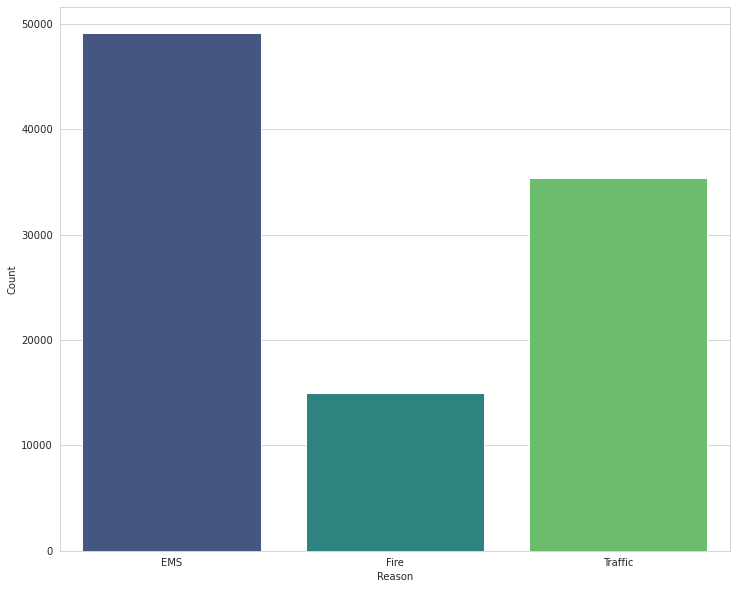

In [18]:
plt.figure(figsize=(12,10))

sns.countplot(x='Reason', data=df, palette='viridis')

plt.xlabel('Reason')

plt.ylabel('Count')

plt.show()

Checking Time format

In [19]:
type(df['timeStamp'])

pandas.core.series.Series

In [20]:
type(df['timeStamp'].iloc[0])

str

In [21]:
# convert type of timstamp column to dtetime

In [22]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [23]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [24]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)

In [25]:
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [26]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


Data we have of the day of week is in the form of integer ranging from 0 to 6 and it is better to define in terms of week days so we initialize a dictionary and map the results with it using the map() function

In [27]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [28]:
df["Day of Week"] = df["Day of Week"].map(dmap)

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


count plot of the day of week column with the hue based off the reason column

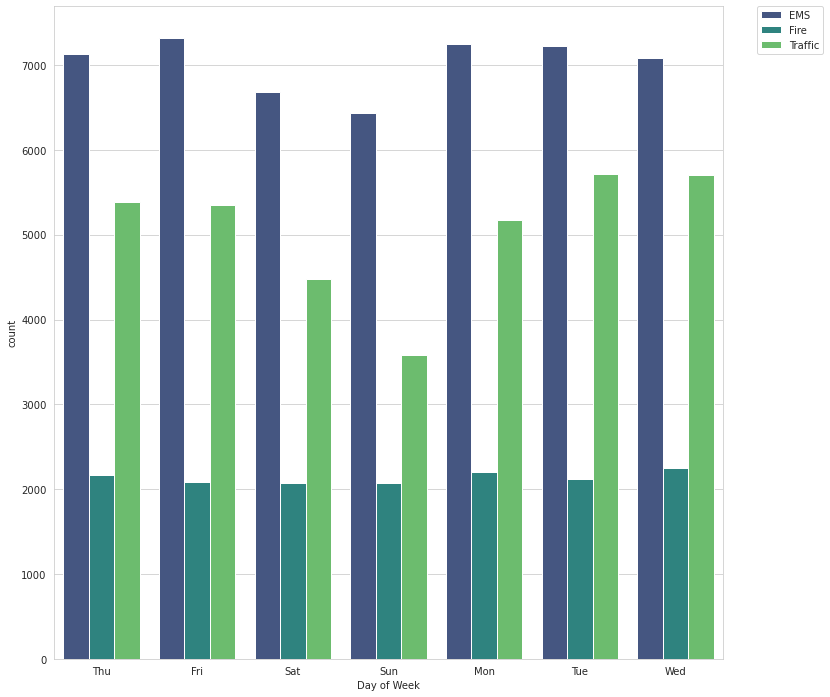

In [34]:
plt.figure(figsize=(12,12))

sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')

#relocate the legend
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

count plot of the Month column with the hue based off the reason column

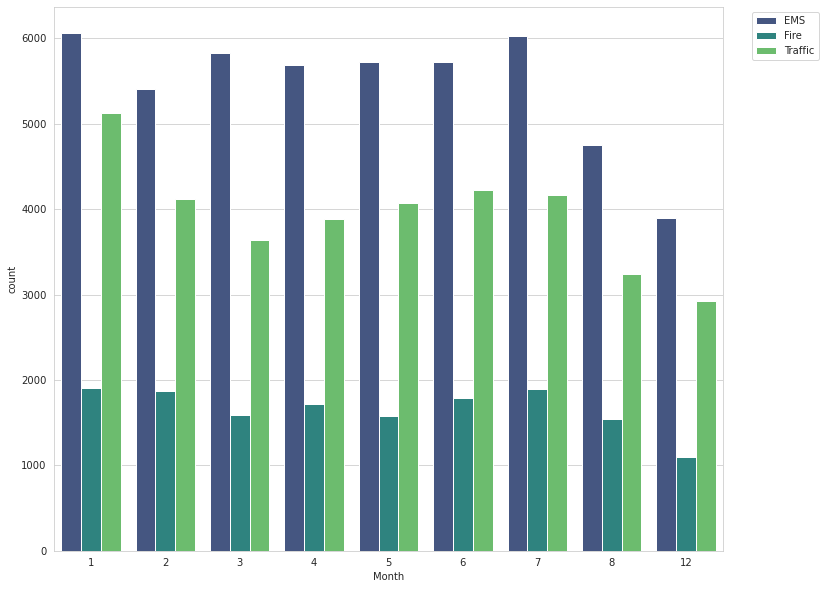

In [37]:
plt.figure(figsize=(12,10))

sns.countplot(data=df, x='Month', hue='Reason', palette='viridis')

plt.legend(bbox_to_anchor=(1.15, 1))


In [ ]:
#here months 9 , 10 , 11

In [38]:
byMonth = df.groupby('Month').count()

byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13096,13096,13096,11512,13096,13096,13094,13096,13096,13096,13096,13096
2,11396,11396,11396,9926,11396,11396,11395,11396,11396,11396,11396,11396
3,11059,11059,11059,9754,11059,11059,11052,11059,11059,11059,11059,11059
4,11287,11287,11287,9897,11287,11287,11284,11287,11287,11287,11287,11287
5,11374,11374,11374,9938,11374,11374,11371,11374,11374,11374,11374,11374
6,11732,11732,11732,10205,11732,11732,11726,11732,11732,11732,11732,11732
7,12088,12088,12088,10626,12088,12088,12086,12088,12088,12088,12088,12088
8,9544,9544,9544,8283,9544,9544,9542,9544,9544,9544,9544,9544
12,7916,7916,7916,6902,7916,7916,7911,7916,7916,7916,7916,7916


<AxesSubplot:xlabel='Month'>

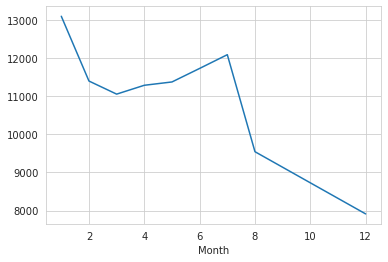

In [39]:
# creating a simple plot off the dataframe indicating the count of calls per month

byMonth['twp'].plot()

create a linear fit on the number of calls per month

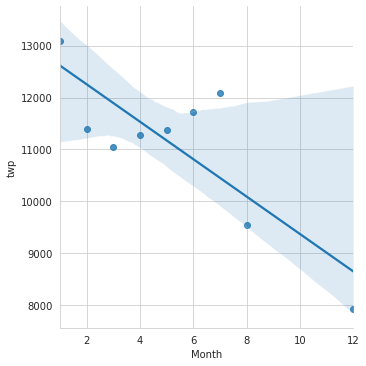

In [40]:
sns.lmplot(x='Month',y='twp', data=byMonth.reset_index())

In [41]:
# create a new column 'Date' using column timeStamp

df['Date'] = df['timeStamp'].apply(lambda t: t.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


groupby 'Date' with the count() aggregate and creating aplot of counts of 911 calls

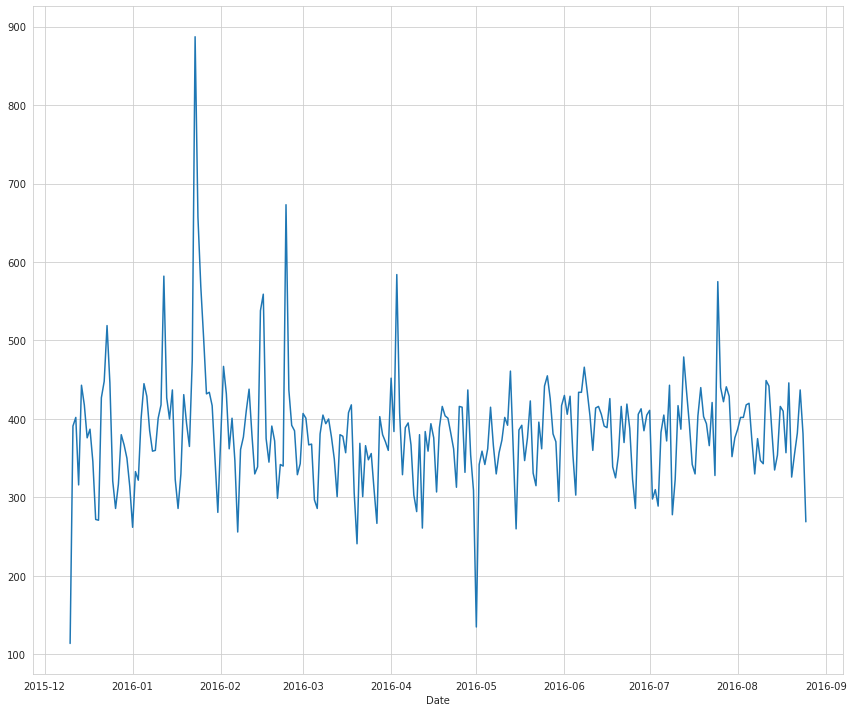

In [44]:
plt.figure(figsize=(12,10))

df.groupby('Date').count()['twp'].plot()

plt.tight_layout()

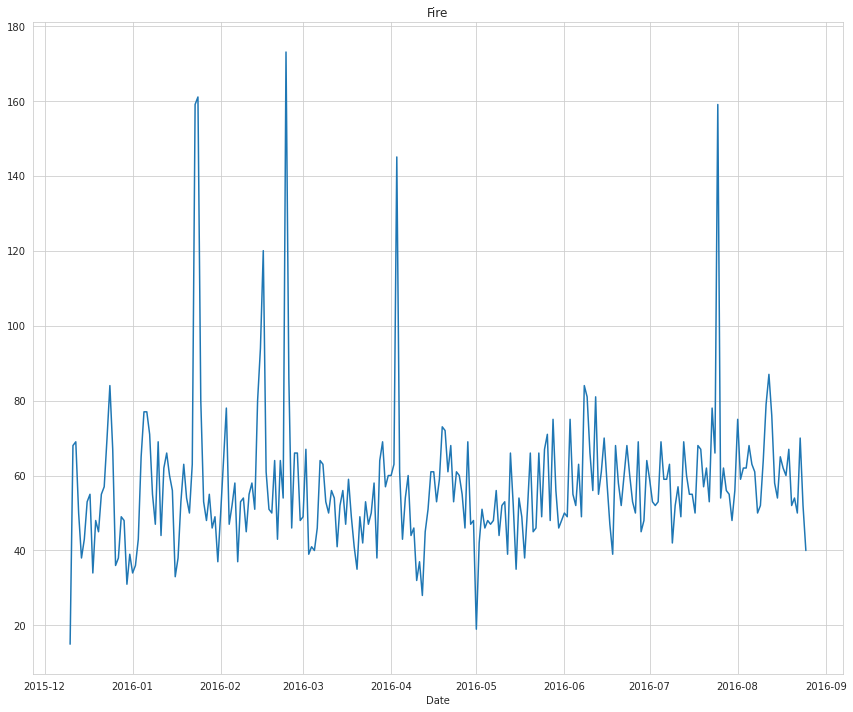

In [47]:
plt.figure(figsize=(12,10))


df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()

plt.title('Fire')

plt.tight_layout()

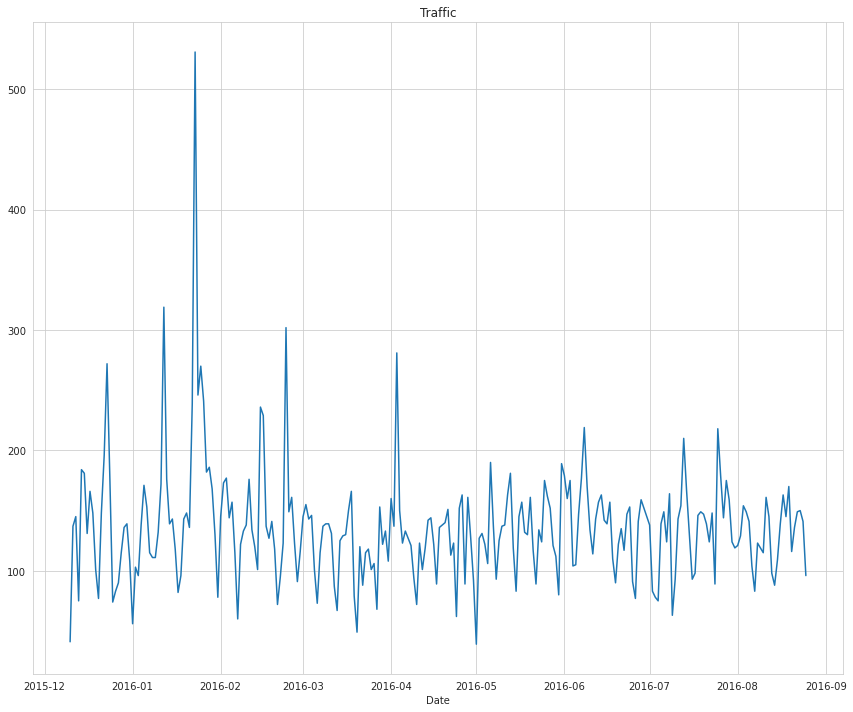

In [48]:
plt.figure(figsize=(12,10))


df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()

plt.title('Traffic')

plt.tight_layout()

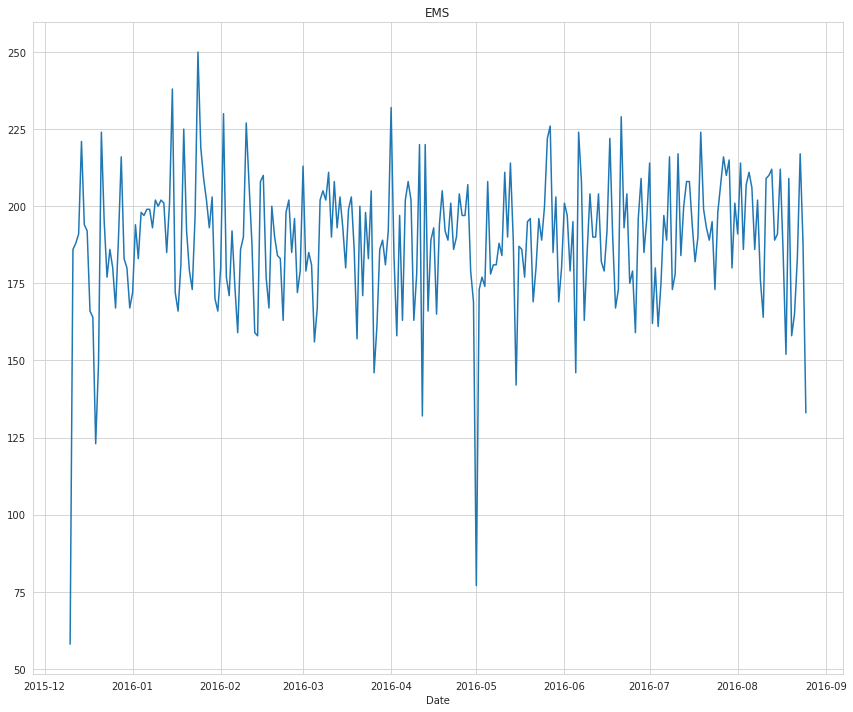

In [49]:
plt.figure(figsize=(12,10))


df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

plt.title('EMS')

plt.tight_layout()

Heat Maps

In [50]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()

In [54]:
dayHour.head(50)

lat   lng  desc  zip  title  timeStamp   twp  addr     e  \
Day of Week Hour                                                              
Fri         0      271   271   271  244    271        271   271   271   271   
            1      227   227   227  195    227        227   227   227   227   
            2      187   187   187  162    187        187   187   187   187   
            3      184   184   184  170    184        184   184   184   184   
            4      201   201   201  184    201        201   201   201   201   
            5      209   209   209  182    209        209   209   209   209   
            6      368   368   368  315    368        368   368   368   368   
            7      635   635   635  561    635        635   635   635   635   
            8      723   723   723  626    723        723   723   723   723   
            9      749   749   749  663    749        749   749   749   749   
            10     796   796   796  717    796        796   796   796   796   
            11     859   859   859  758    859        859   859   859   859   
            12     873   873   873  762    873        873   873   873   873   
            13     903   903   903  777    903        903   903   903   903   
            14     927   927   927  811    927        927   926   927   927   
            15     971   971   971  838    971        971   971   971   971   
            16    1036  1036  1036  891   1036       1036  1036  1036  1036   
            17     972   972   972  824    972        972   972   972   972   
            18     793   793   793  695    793        793   792   793   793   
            19     720   720   720  641    720        720   720   720   720   
            20     636   636   636  539    636        636   636   636   636   
            21     561   561   561  500    561        561   561   561   561   
            22     518   518   518  450    518        518   518   518   518   
            23     445   445   445  382    445        445   445   445   445   
Mon         0      280   280   280  246    280        280   280   280   280   
            1      213   213   213  189    213        213   212   213   213   
            2      213   213   213  193    213        213   213   213   213   
            3      182   182   182  164    182        182   182   182   182   
            4      213   213   213  194    213        213   213   213   213   
            5      267   267   267  222    267        267   267   267   267   
            6      404   404   404  344    404        404   404   404   404   
            7      679   679   679  574    679        679   679   679   679   
            8      828   828   828  727    828        828   828   828   828   
            9      795   795   795  700    795        795   794   795   795   
            10     772   772   772  682    772        772   772   772   772   
            11     819   819   819  725    819        819   819   819   819   
            12     898   898   898  790    898        898   898   898   898   
            13     830   830   830  709    830        830   830   830   830   
            14     860   860   860  758    860        860   860   860   860   
            15     939   939   939  804    939        939   939   939   939   
            16     964   964   964  815    964        964   963   964   964   
            17     994   994   994  849    994        994   994   994   994   
            18     878   878   878  764    878        878   878   878   878   
            19     732   732   732  646    732        732   732   732   732   
            20     611   611   611  549    611        611   611   611   611   
            21     471   471   471  420    471        471   470   471   471   
            22     463   463   463  405    463        463   463   463   463   
            23     320   320   320  293    320        320   320   320   320   
Sat         0      369   369   369  320    369        369   367   369

In [55]:
dayHour = dayHour['Reason']

dayHour

Day of Week  Hour
Fri          0       271
             1       227
             2       187
             3       184
             4       201
                    ... 
Wed          19      686
             20      675
             21      564
             22      494
             23      330
Name: Reason, Length: 168, dtype: int64

In [56]:
dayHour = dayHour.unstack()

dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,271,227,187,184,201,209,368,635,723,749,...,927,971,1036,972,793,720,636,561,518,445
Mon,280,213,213,182,213,267,404,679,828,795,...,860,939,964,994,878,732,611,471,463,320
Sat,369,293,257,254,224,243,262,396,479,630,...,771,800,814,765,767,703,609,561,498,456
Sun,362,316,280,266,233,246,301,408,496,620,...,692,671,668,717,673,648,519,464,388,336
Thu,283,204,237,163,179,223,386,607,789,848,...,901,989,935,1037,811,684,612,538,409,350


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

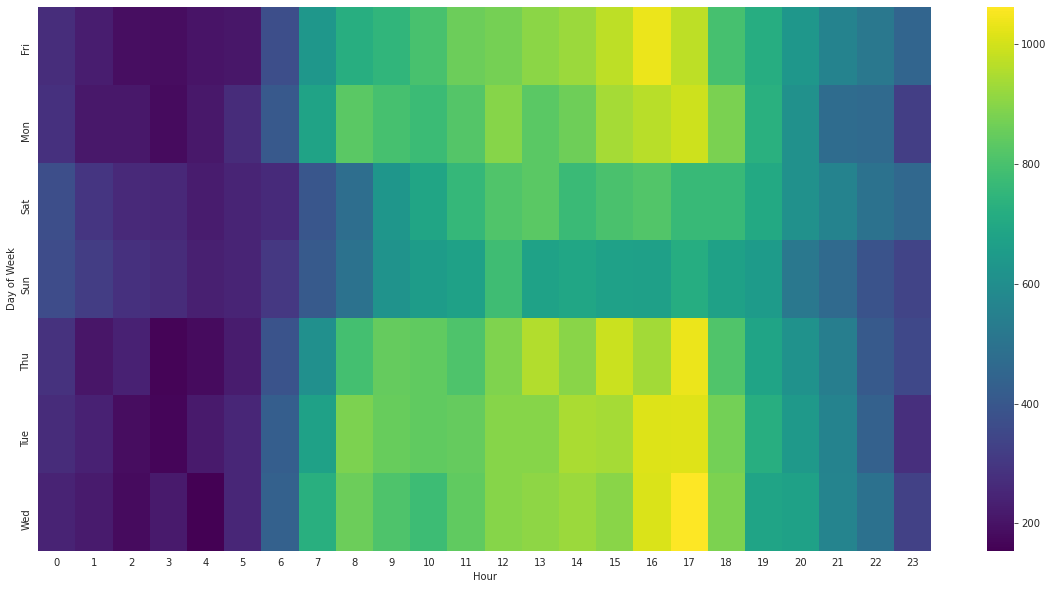

In [66]:
plt.figure(figsize=(20,10))

sns.heatmap(dayHour, cmap='viridis')

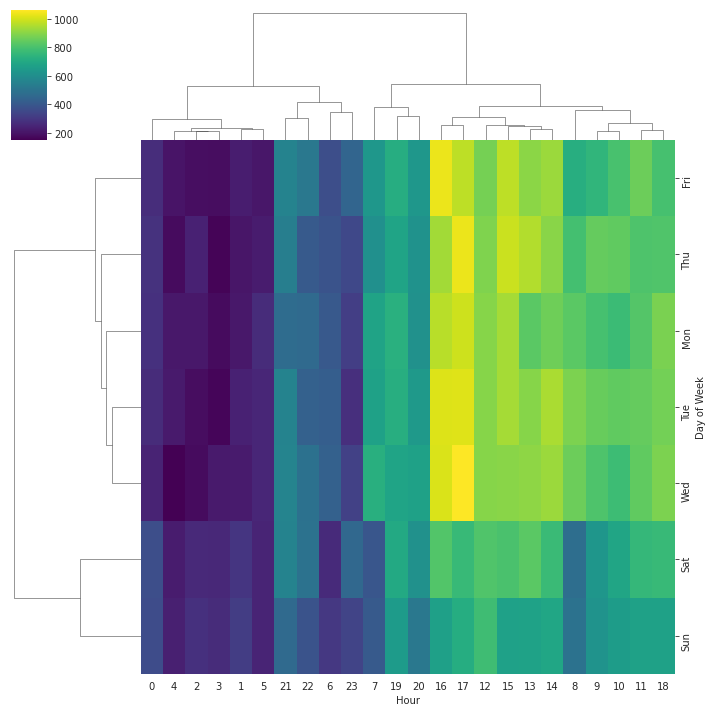

In [67]:
sns.clustermap(dayHour, cmap='viridis')

In [68]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()

dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1950,1564,1521,1949,1725,1647,2042,1308,1058
Mon,1718,1959,1534,1594,1776,1609,1685,1499,1251
Sat,2253,1435,1264,1736,1438,1376,1691,1085,960
Sun,1947,1223,1097,1486,1413,1329,1667,1020,904
Thu,1584,1582,1883,1592,1585,2055,1642,1494,1262


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

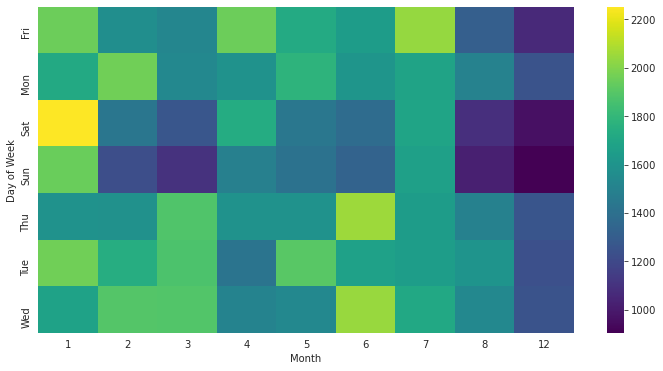

In [69]:
plt.figure(figsize=(12,6))

sns.heatmap(dayMonth, cmap='viridis')